#  Überblick über die Daten verschaffen:  
- nötige Module importieren  
- prüfen, ob csv-Datei korrekt eingelesen wurde
- Form, Zusammenfassung und Data Types des Dataframes ausgeben
- kategorische Spalen in Datentyp "Kategorie" umwandeln  
- neue Spalte "arrival_date" aus Datumsspalten erstellen

In [1]:
import pandas as pd
import openpyxl
import datetime
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\kevin\Desktop\hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [8]:
#laut Datenwörterbuch bedeuten 'Undefined' und 'SC' -> keine Mahlzeiten gebucht
df.loc[df["meal"] == "Undefined", "meal"] = "SC"
df["meal"]=df["meal"].astype("category")

In [9]:
df["hotel"]=df["hotel"].astype("category")

In [10]:
df["arrival_date"] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' + 
    df['arrival_date_month'].astype(str) + '-' + 
    df['arrival_date_day_of_month'].astype(str)
)

In [11]:
df['arrival_date_month'].unique()


array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [12]:
df['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [13]:
df['market_segment'] = df['market_segment'].replace('Undefined', np.nan)

In [14]:
df["country"].value_counts().head(20).sort_values(ascending=False)

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      999
POL      919
ISR      669
RUS      632
NOR      607
Name: count, dtype: int64

In [15]:
top_countries = df['country'].value_counts().nlargest(10).index
df['country_grouped'] = df['country'].apply(lambda x: x if x in top_countries else 'Other')


# EDA  
- Boxplots und Korrellogramm erstellen

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

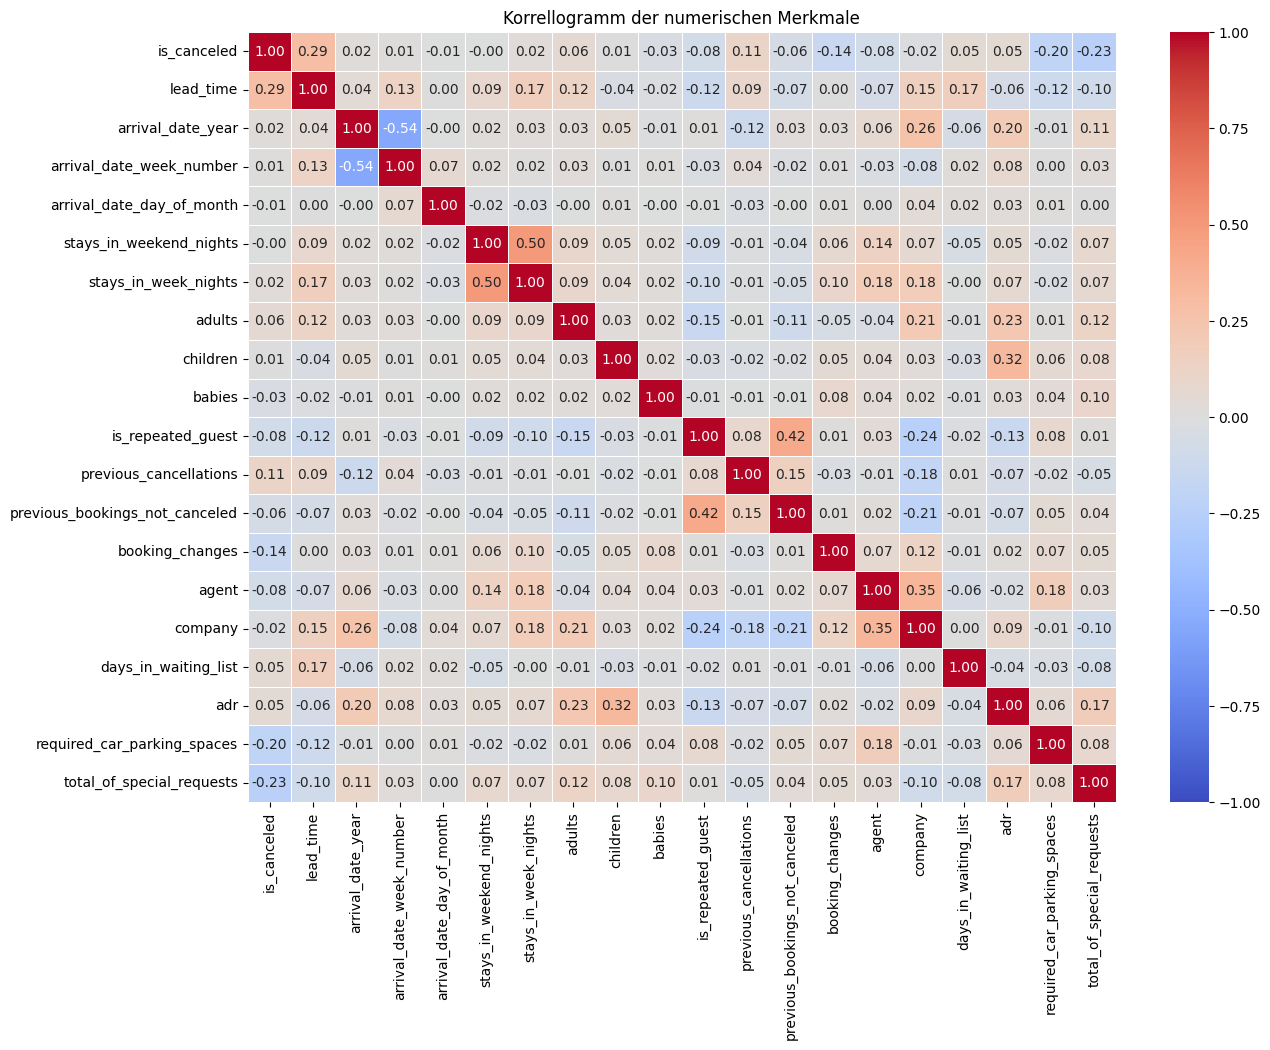

In [17]:
df_numeric = df.select_dtypes(include='number')
corr = df_numeric.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, center=0,vmin=-1,
vmax=1)
plt.title("Korrellogramm der numerischen Merkmale")
plt.show()


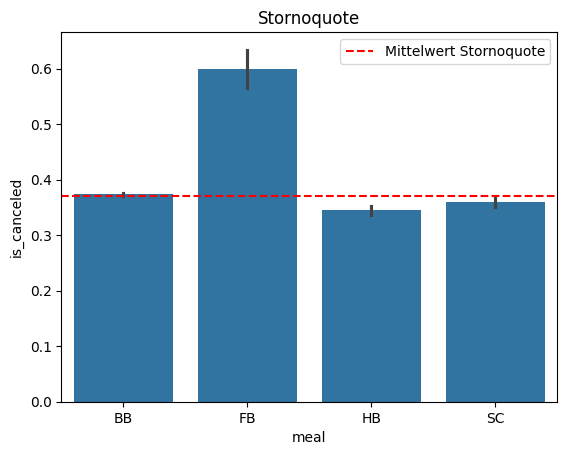

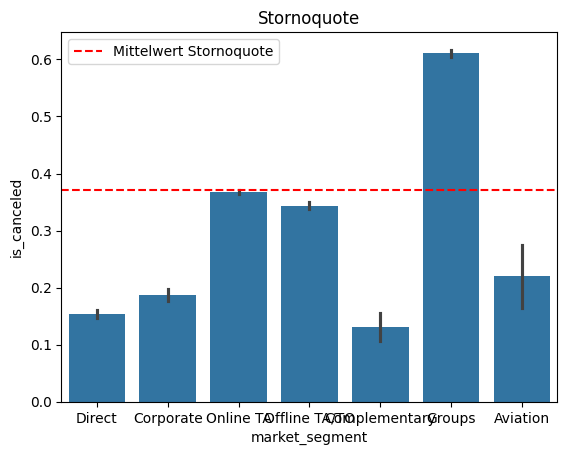

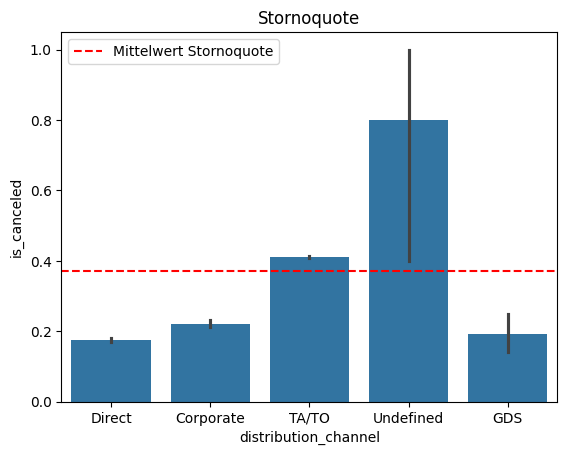

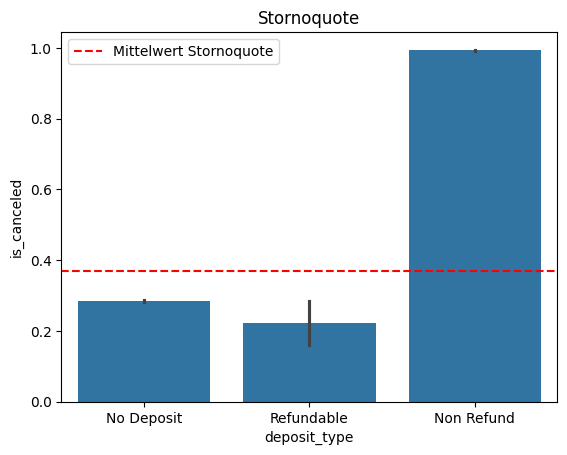

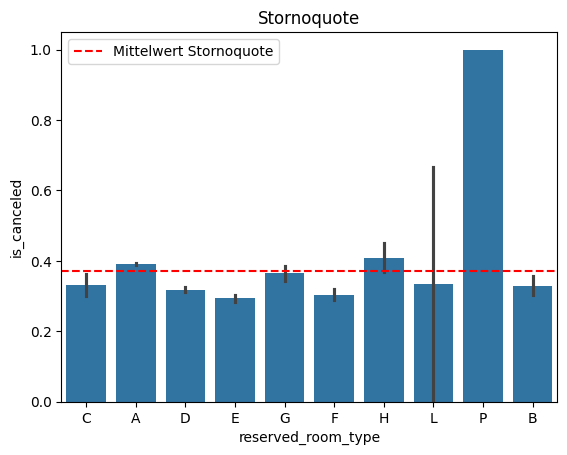

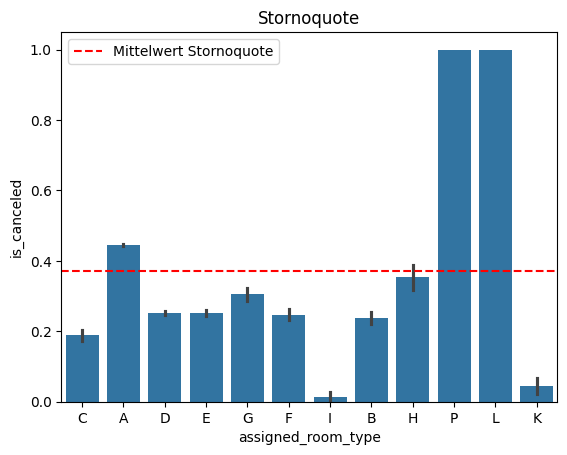

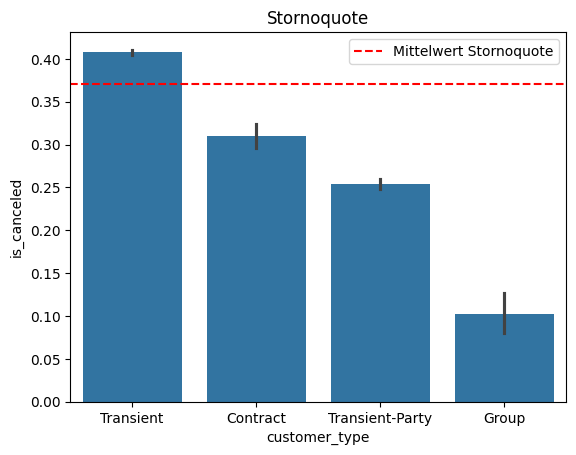

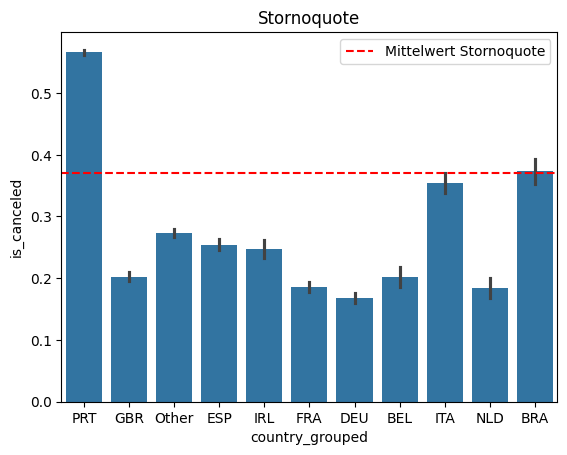

In [18]:
categorical_vars = [
    'meal', 'market_segment', 'distribution_channel', 'deposit_type', 'reserved_room_type', 'assigned_room_type', 'customer_type','country_grouped']
mean_is_canceled=df["is_canceled"].mean()
for var in categorical_vars:
    sns.barplot(data=df, x=var, y='is_canceled')
    plt.axhline(y=mean_is_canceled, color='red', linestyle='--',label="Mittelwert Stornoquote")
    plt.legend()
    plt.title("Stornoquote")
    plt.show()
    


# Data Cleaning


In [41]:
columns_to_check=categorical_vars+["lead_time","required_car_parking_spaces","total_of_special_requests"]
df[columns_to_check].isna().sum()

meal                           0
market_segment                 0
distribution_channel           0
deposit_type                   0
reserved_room_type             0
assigned_room_type             0
customer_type                  0
country_grouped                0
lead_time                      0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

In [42]:
print(df["market_segment"].value_counts())
df['market_segment'] = df['market_segment'].fillna('Online TA')

market_segment
Online TA        56479
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Name: count, dtype: int64


In [43]:
df['lead_time'].describe()


count    119390.000000
mean        103.409180
std         104.600923
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         444.000000
Name: lead_time, dtype: float64

In [44]:
lead_time_cap = df['lead_time'].quantile(0.99)
df['lead_time'] = df['lead_time'].clip(upper=lead_time_cap)


In [45]:
df["required_car_parking_spaces"].describe()
mask_parking=df["required_car_parking_spaces"]>=3
pd.set_option("display.max_columns", None)
df.loc[mask_parking, "required_car_parking_spaces"] = 1

In [46]:
df["meal"].value_counts()
#'FB' hat höchste Stornoquote, macht aber nur 0,66% der Buchungen aus, zudem sind die übrigen Ausprägungen allesamt sehr nah am Durchschitt -> Variable ungeeignet

meal
BB    92310
HB    14463
SC    11819
FB      798
Name: count, dtype: int64

In [47]:
df["distribution_channel"].value_counts()
#undefined hat die höchste Stornoquote, aber nur 5 Datenpunkte; GDS nur 0,16 % der Ausprägungen! Restliche Variablen aber interessant

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

In [48]:
print(df["deposit_type"].value_counts(dropna=False))
#Refundable macht weniger als 0,15 % aus, für Modell sinvoll, später in 2 Gruppen ("bezahlt"/"nichts bezahlt") aufzuteilen
mask_deposit = df["deposit_type"].isin(["Refundable", "Non Refund"])
df["deposit_paid"] = 0 
df.loc[mask_deposit, "deposit_paid"] = 1  



deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64


In [49]:
df["reserved_room_type"].value_counts(dropna=False)
# P und L haben die höchste Abweichung von der durchschnittlichen Stornorate, kommen jedoch nur 12 bzw 6 Mal vor, daher keine geeignete Variable!

reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64

In [50]:
df["assigned_room_type"].value_counts(dropna=False)
# P und L haben die höchste Abweichung von der durchschnittlichen Stornorate, kommen jedoch nur 12 bzw 1 Mal vor, daher keine geeignete Variable!

assigned_room_type
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: count, dtype: int64

In [58]:
#Die Frage, ob Gäste gewünschten room_type bekommen, beeinflusst Stornoquote deutlicher.
mask_room=df["reserved_room_type"]!=df["assigned_room_type"]
df[mask_room].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,deposit_paid
count,14917.000000,14917.000000,14917.000000,14917.000000,14917.000000,14917.000000,14917.000000,14917.000000,14917.000000,14917.000000,14917.000000,14917.000000,14917.000000,14917.000000,11275.000000,1876.000000,14917.000000,14917.000000,14917.000000,14917.000000,14917,14917.000000
mean,0.053764,63.704096,2015.974191,27.415499,15.680164,0.725012,2.040558,1.761346,0.090099,0.012737,0.071060,0.019776,0.311122,0.383321,114.079024,201.664712,1.909432,83.357396,0.114299,0.616344,2016-06-24 07:39:47.531005184,0.008313
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000,2015-07-01 00:00:00,0.000000
25%,0.000000,4.000000,2015.000000,14.000000,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,86.000000,0.000000,49.000000,0.000000,0.000000,2015-12-26 00:00:00,0.000000
50%,0.000000,27.000000,2016.000000,28.000000,16.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,215.000000,0.000000,75.790000,0.000000,0.000000,2016-06-02 00:00:00,0.000000
75%,0.000000,91.000000,2016.000000,41.000000,23.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,240.000000,284.500000,0.000000,109.800000,0.000000,1.000000,2016-12-13 00:00:00,0.000000
max,1.000000,444.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,9.000000,1.000000,11.000000,72.000000,21.000000,531.000000,530.000000,391.000000,510.000000,2.000000,5.000000,2017-08-31 00:00:00,1.000000
std,0.225559,84.432951,0.698477,15.145236,8.679119,0.955640,1.850479,0.561598,0.334696,0.133937,0.256933,0.228554,1.877216,0.906983,118.203759,129.851090,15.487446,47.809212,0.319237,0.814167,NaN,0.090797


In [ ]:
df["got_requested_room_type"]=1
df.loc[mask_room,"got_requested_room_type"]=0

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,country_grouped,deposit_paid,got_requested_room_type
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,GBR,0,0
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,2015-07-05,2015-07-01,Other,0,0
15,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,2015-07-05,2015-07-01,IRL,0,0
17,Resort Hotel,0,12,2015,July,27,1,0,1,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,E,0,No Deposit,240.0,NaN,0,Transient,88.20,0,0,Check-Out,2015-07-02,2015-07-01,IRL,0,0
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02,2015-07-01,FRA,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119273,City Hotel,0,213,2017,August,35,28,1,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,K,1,No Deposit,19.0,NaN,0,Transient-Party,104.00,0,0,Check-Out,2017-09-01,2017-08-28,PRT,0,0
119274,City Hotel,0,213,2017,August,35,28,1,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,K,2,No Deposit,19.0,NaN,0,Transient-Party,104.00,0,0,Check-Out,2017-09-01,2017-08-28,PRT,0,0
119289,City Hotel,0,25,2017,August,35,30,0,3,3,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,E,F,1,No Deposit,9.0,NaN,0,Transient,236.33,0,3,Check-Out,2017-09-02,2017-08-30,ITA,0,0
119297,City Hotel,0,332,2017,August,35,31,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,F,4,No Deposit,9.0,NaN,0,Transient,170.80,0,2,Check-Out,2017-09-02,2017-08-31,GBR,0,0


In [51]:
df["customer_type"].value_counts(dropna=False)
#Group nur 0,4 %, nicht geeignet, restliche Ausprägungen interessant

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

In [52]:
df["country_grouped"].value_counts(dropna=False)

country_grouped
PRT      48590
Other    18590
GBR      12129
FRA      10415
ESP       8568
DEU       7287
ITA       3766
IRL       3375
BEL       2342
BRA       2224
NLD       2104
Name: count, dtype: int64

# Ergebnis:  
- market_segment, lead_time, required_car_parking_spaces, distribution_channel (nur Ausprägungen "TA/TO" ,"Direct","Corporate"), deposit_paid, got_requested_room_type, customer_type (ohne Ausprägung "group") und country_grouped stellen sich als relevante Variablen dar.

# Beginn der Analyse

In [53]:
#Dataframe aufteilen in Resort Hotel und City Hotel
df["hotel"].unique()
df_city = df[df['hotel'] == 'City Hotel']
df_resort = df[df['hotel'] == 'Resort Hotel']
print(df_city.shape,df_resort.shape)

(79330, 35) (40060, 35)
